In [1]:
!apt-get update # Update apt-get repository.
!apt-get install openjdk-8-jdk-headless -qq > /dev/null # Install Java.
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz # Download Apache Sparks.
!tar xf spark-3.1.1-bin-hadoop3.2.tgz # Unzip the tgz file.
!pip install -q findspark # Install findspark. Adds PySpark to the System path during runtime.
from google.colab import drive
drive.mount('/content/gdrive')

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,148 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,617 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jamm

In [2]:


# Set environment variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"
DATASET_PATH = "/content/gdrive/MyDrive/Sem\ 3/DPS/Project/Milestone1/yelp_dataset"

!ls

# Initialize findspark
import findspark
findspark.init()

# Create a PySpark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("YelpDataAnalysis").getOrCreate()
spark

gdrive	sample_data  spark-3.1.1-bin-hadoop3.2	spark-3.1.1-bin-hadoop3.2.tgz


In [3]:
business_df = spark.read.json(f"{DATASET_PATH}/yelp_academic_dataset_business.json")
review_df = spark.read.json(f"{DATASET_PATH}/yelp_academic_dataset_review.json")
user_df = spark.read.json(f"{DATASET_PATH}/yelp_academic_dataset_user.json")
tip_df = spark.read.json(f"{DATASET_PATH}/yelp_academic_dataset_tip.json")
checkin_df = spark.read.json(f"{DATASET_PATH}/yelp_academic_dataset_checkin.json")

In [4]:
business_df.printSchema()
business_df.show(5)
business_df.count()

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

150346

In [5]:
tip_df.printSchema()
tip_df.show(5)
tip_df.count()

root
 |-- business_id: string (nullable = true)
 |-- compliment_count: long (nullable = true)
 |-- date: string (nullable = true)
 |-- text: string (nullable = true)
 |-- user_id: string (nullable = true)

+--------------------+----------------+-------------------+--------------------+--------------------+
|         business_id|compliment_count|               date|                text|             user_id|
+--------------------+----------------+-------------------+--------------------+--------------------+
|3uLgwr0qeCNMjKenH...|               0|2012-05-18 02:17:21|Avengers time wit...|AGNUgVwnZUey3gcPC...|
|QoezRbYQncpRqyrLH...|               0|2013-02-05 18:35:10|They have lots of...|NBN4MgHP9D3cw--Sn...|
|MYoRNLb5chwjQe3c_...|               0|2013-08-18 00:56:08|It's open even wh...|-copOvldyKh1qr-vz...|
|hV-bABTK-glh5wj31...|               0|2017-06-27 23:05:38|Very decent fried...|FjMQVZjSqY8syIO-5...|
|_uN0OudeJ3Zl_tf6n...|               0|2012-10-06 19:43:09|Appetizers.. plat...|

908915

In [6]:
review_df.printSchema()
review_df.show(5)
review_df.count()

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|XQfwVwDr-v0ZS3_Cb...|   0|2018-07-07 22:09:11|    0|KU_O5udG6zpxOg-Vc...|  3.0|If you decide to ...|     0|mh_-eMZ6K5RLWhZyI...|
|7ATYjTIgM3jUlt4UM...|   1|2012-01-03 15:28:18|    0|BiTunyQ73aT9WBnpR...|  5.0|I've taken a lot ...|     1|OyoGAe7OKpv6SyGZT...|
|YjUWPp

6990280

In [7]:
checkin_df.printSchema()
checkin_df.show(5)
checkin_df.count()

root
 |-- business_id: string (nullable = true)
 |-- date: string (nullable = true)

+--------------------+--------------------+
|         business_id|                date|
+--------------------+--------------------+
|---kPU91CF4Lq2-Wl...|2020-03-13 21:10:...|
|--0iUa4sNDFiZFrAd...|2010-09-13 21:43:...|
|--30_8IhuyMHbSOcN...|2013-06-14 23:29:...|
|--7PUidqRWpRSpXeb...|2011-02-15 17:12:...|
|--7jw19RH9JKXgFoh...|2014-04-21 20:42:...|
+--------------------+--------------------+
only showing top 5 rows



131930

In [8]:
user_df.printSchema()
user_df.show(5)
user_df.count()

root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)

+-------------+---------------+---------------+----------------+-----

1987897

In [11]:
business_df.select("categories").distinct().show(truncate=False)

+-----------------------------------------------------------------------------------------------------------------------------+
|categories                                                                                                                   |
+-----------------------------------------------------------------------------------------------------------------------------+
|Arts & Entertainment, Event Planning & Services, Venues & Event Spaces, Museums                                              |
|Food, Convenience Stores, Restaurants, Food Delivery Services, Local Flavor, Delis                                           |
|Automotive, Auto Repair, Towing, Body Shops, Oil Change Stations, Auto Parts & Supplies, Tires                               |
|Makeup Artists, Hair Salons, Beauty & Spas                                                                                   |
|Breweries, American (New), Restaurants, Burgers, American (Traditional), Gastropubs, Brewpubs, Food, Fi

In [19]:
from pyspark.sql.functions import explode, split, col, count, desc

automotive_df = business_df.filter((col("state") == "AZ") & (col("categories").like("%Automotive%")))
automotive_df.write.parquet(f"{DATASET_PATH}/arizona_autos_businesses.parquet")
# Show filtered dataset
automotive_df.show(5)
automotive_df.count()

+--------------------+--------------------+--------------------+--------------------+------+--------------------+-------+----------+------------+--------------------+-----------+------------+-----+-----+
|             address|          attributes|         business_id|          categories|  city|               hours|is_open|  latitude|   longitude|                name|postal_code|review_count|stars|state|
+--------------------+--------------------+--------------------+--------------------+------+--------------------+-------+----------+------------+--------------------+-----------+------------+-----+-----+
|     625 N Stone Ave|{null, null, null...|rBmpy_Y1UbBx8ggHl...|Automotive, Auto ...|Tucson|{8:0-17:0, 0:0-0:...|      1|32.2298719|-110.9723419|Arizona Truck Out...|      85705|          10|  4.5|   AZ|
|     4158 E Grant Rd|                null|eYxGFkxo6m3SYGVTh...|Towing, Hotels & ...|Tucson|{8:30-18:0, 8:30-...|      1|32.2503237|-110.9036553|Big Boyz Toyz Mot...|      85712|      

872

In [20]:
automotive_df.createOrReplaceTempView("automotive")
checkin_df.createOrReplaceTempView("checkin")
review_df.createOrReplaceTempView("reviews")

## SQL Queries

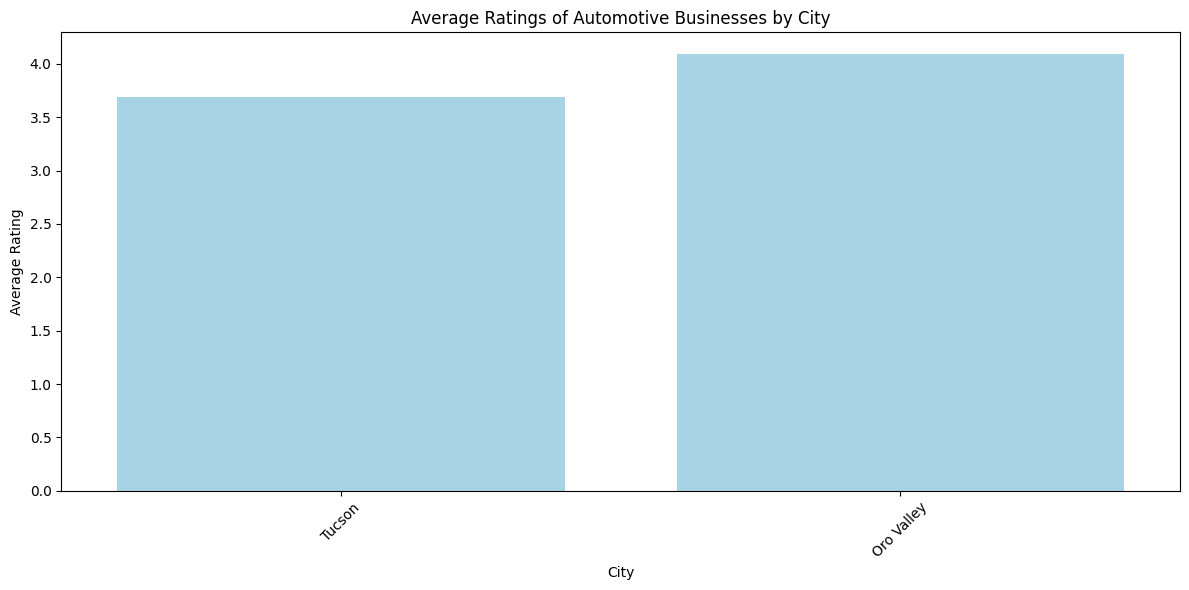


City Statistics:
      city  avg_rating  business_count
    Tucson    3.687349             830
Oro Valley    4.090909              11


In [23]:
## Rating Distribution by City (Top 5 Cities):
import seaborn as sns
import matplotlib.pyplot as plt

city_ratings = spark.sql("""
    SELECT
        city,
        AVG(stars) as avg_rating,
        COUNT(*) as business_count
    FROM automotive
    GROUP BY city
    HAVING business_count >= 5
    ORDER BY business_count DESC
    LIMIT 5
""").toPandas()

# Create visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=city_ratings, x='city', y='avg_rating',
            color='skyblue', alpha=0.8)
plt.title('Average Ratings of Automotive Businesses by City')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print statistics
print("\nCity Statistics:")
print(city_ratings.to_string(index=False))

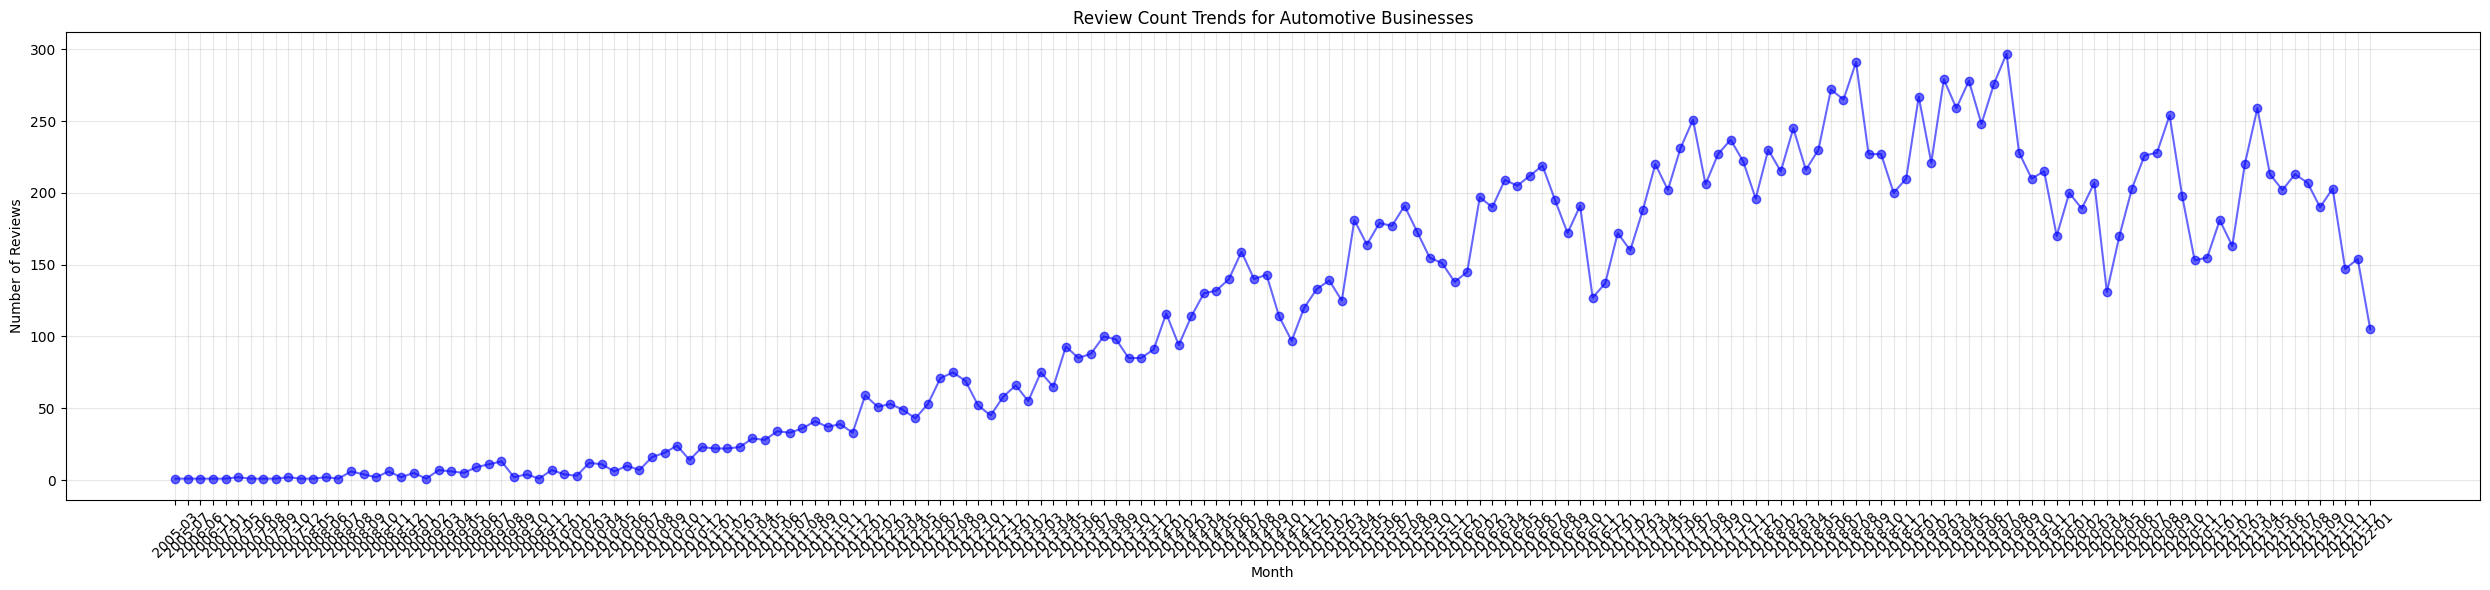

In [25]:
# Review Count Trends Over Time:

# Get data
review_trends = spark.sql("""
    SELECT
        DATE_FORMAT(date, 'yyyy-MM') as month,
        COUNT(*) as review_count
    FROM reviews r
    JOIN automotive a ON r.business_id = a.business_id
    GROUP BY DATE_FORMAT(date, 'yyyy-MM')
    ORDER BY month
""").toPandas()

# Create visualization
plt.figure(figsize=(25, 6))
plt.plot(review_trends['month'], review_trends['review_count'],
         marker='o', linestyle='-', color='blue', alpha=0.6)
plt.title('Review Count Trends for Automotive Businesses')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

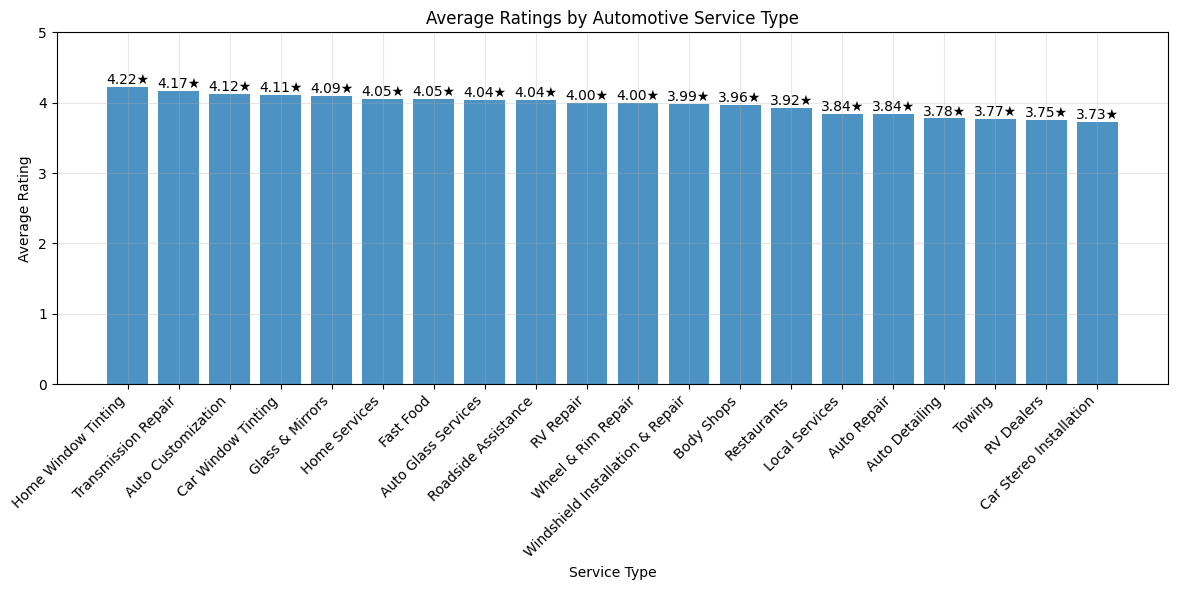

In [38]:
## Rating Distribution by Service Type
service_ratings = spark.sql("""
    WITH ServiceTypes AS (
        SELECT
            business_id,
            stars,
            review_count,
            explode(split(categories, ', ')) as service_type
        FROM automotive
    )
    SELECT
        service_type,
        AVG(stars) as avg_rating,
        COUNT(*) as business_count,
        AVG(review_count) as avg_reviews
    FROM ServiceTypes
    GROUP BY service_type
    HAVING business_count >= 10
    ORDER BY avg_rating DESC
    LIMIT 20
""").toPandas()

# Create visualization
plt.figure(figsize=(12, 6))
bars = plt.bar(service_ratings['service_type'],
              service_ratings['avg_rating'],
              alpha=0.8)

# Add review count as text on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}★',
            ha='center', va='bottom')

plt.title('Average Ratings by Automotive Service Type')
plt.xlabel('Service Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 5)  # Rating scale is 1-5
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

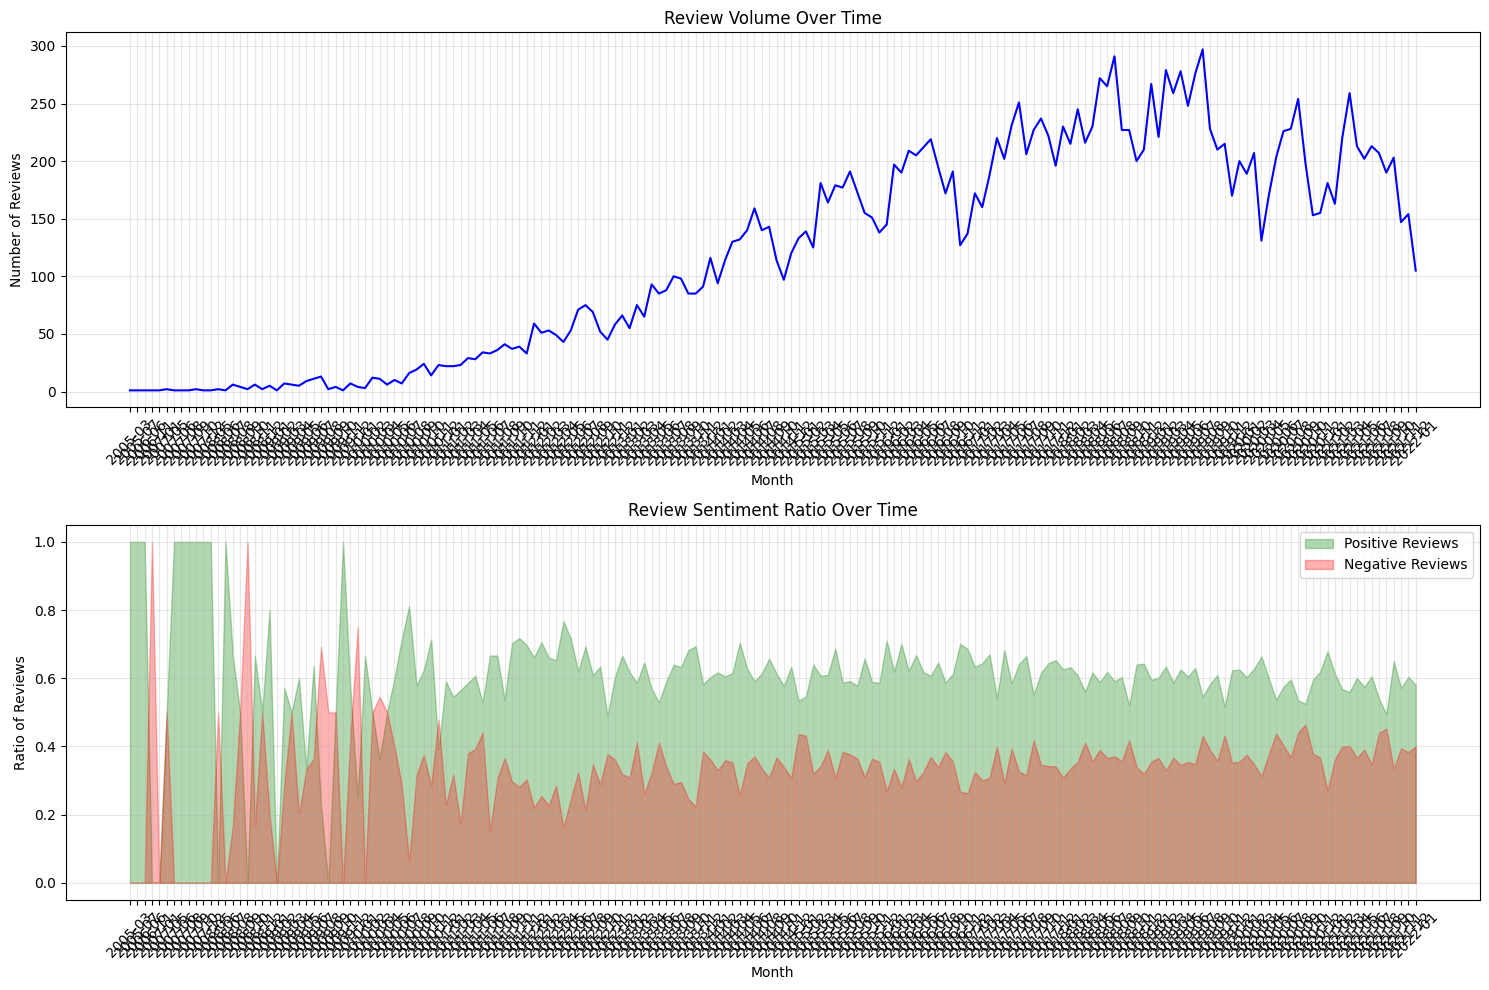

In [40]:
## Review Sentiment Over Time:

review_trends = spark.sql("""
    SELECT
        DATE_FORMAT(r.date, 'yyyy-MM') as month,
        COUNT(*) as review_count,
        AVG(r.stars) as avg_rating,
        COUNT(CASE WHEN r.stars >= 4 THEN 1 END) as positive_reviews,
        COUNT(CASE WHEN r.stars <= 2 THEN 1 END) as negative_reviews
    FROM reviews r
    JOIN automotive a ON r.business_id = a.business_id
    GROUP BY DATE_FORMAT(r.date, 'yyyy-MM')
    ORDER BY month
""").toPandas()

# Create visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Plot total reviews trend
ax1.plot(review_trends['month'],
        review_trends['review_count'],
        label='Total Reviews',
        color='blue')
ax1.set_title('Review Volume Over Time')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Reviews')
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Plot sentiment ratio
ax2.fill_between(review_trends['month'],
                review_trends['positive_reviews'] / review_trends['review_count'],
                color='green',
                alpha=0.3,
                label='Positive Reviews')
ax2.fill_between(review_trends['month'],
                review_trends['negative_reviews'] / review_trends['review_count'],
                color='red',
                alpha=0.3,
                label='Negative Reviews')
ax2.set_title('Review Sentiment Ratio Over Time')
ax2.set_xlabel('Month')
ax2.set_ylabel('Ratio of Reviews')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

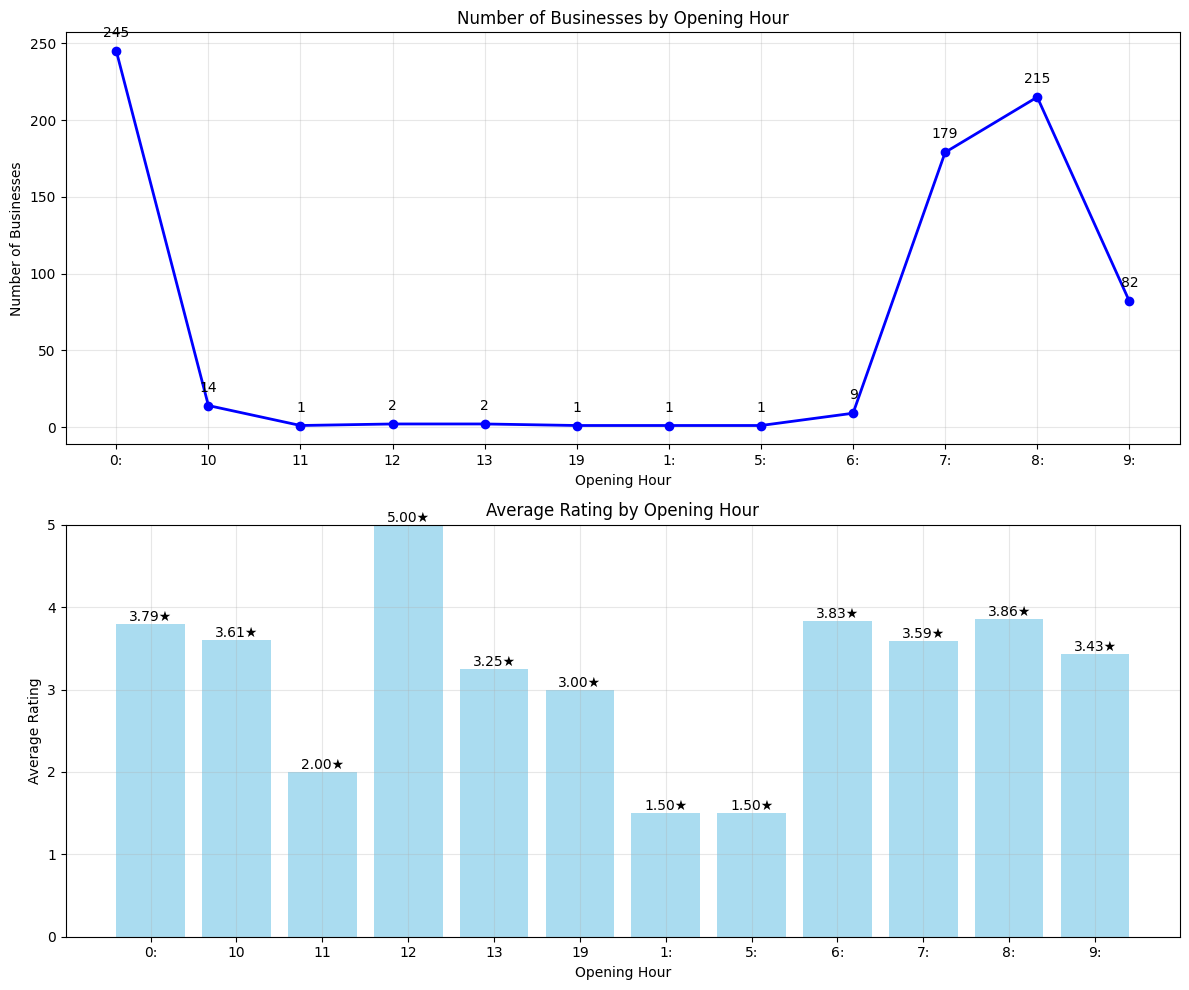

In [45]:
## Business Hours Analysis:
hours_analysis = spark.sql("""
    SELECT
        SUBSTRING(hours.Monday, 1, 2) as opening_hour,
        COUNT(*) as business_count,
        AVG(stars) as avg_rating,
        AVG(review_count) as avg_reviews
    FROM automotive
    WHERE hours.Monday IS NOT NULL
    GROUP BY SUBSTRING(hours.Monday, 1, 2)
    ORDER BY opening_hour
""").toPandas()

# Create visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot business count by hour
line = ax1.plot(hours_analysis['opening_hour'],
                hours_analysis['business_count'],
                marker='o',
                linewidth=2,
                color='blue')
ax1.set_title('Number of Businesses by Opening Hour')
ax1.set_xlabel('Opening Hour')
ax1.set_ylabel('Number of Businesses')
ax1.grid(True, alpha=0.3)

# Add value labels on the line
for x, y in zip(hours_analysis['opening_hour'], hours_analysis['business_count']):
    ax1.annotate(str(int(y)),
                (x, y),
                textcoords="offset points",
                xytext=(0,10),
                ha='center')

# Plot average rating by hour
bars = ax2.bar(hours_analysis['opening_hour'],
              hours_analysis['avg_rating'],
              alpha=0.7,
              color='skyblue')
ax2.set_title('Average Rating by Opening Hour')
ax2.set_xlabel('Opening Hour')
ax2.set_ylabel('Average Rating')
ax2.set_ylim(0, 5)
ax2.grid(True, alpha=0.3)

# Add rating values on top of bars
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}★',
            ha='center', va='bottom')

plt.tight_layout()
plt.show()